# Datamæssige sammenhænge

Når vi arbejder med datamæssige sammenhænge undersøger vi potentielle sammenhænge i vores indsamlet data. Oftest, når vi arbejder med data på den måde, så har vi forud for dataindsamlingen en hypotese for, hvilke sammenhænge vi vil se. Eksempelvis, hvis vi gik ud og spurgte rige personer, hvilken bil de kører rundt i, så har vi en forventning om, at det vil være dyre biler. Ind i mellem kan der godt være nogle, der ikke følger den forventning, men i det større perspektiv, så vil data over indkomst og bilens værdi nok vise, at der er en sammenhæng.

## Scatterplot

For at komme et skridt nærmere på at forstå, om vores data udviser en form for tendens, kan vi plotte vores datapunkter mod hinanden. Det gør vi i et såkaldt *scatterplot*. Lad os vise dette med et eksempel.

````{prf:eksempel} 
:label: hoejde-og-skostoerrelse-scatter

Vi får til opgave at undersøge, om der er en sammenhæng mellem højder og skostørrelser på elever i en klasse på et gymnasium. Vi indsamler følgende data, som er gemt i filen {download}`eks_hoejde-og-skostoerrelse.xlsx<./eks_hoejde-og-skostoerrelse.xlsx>`

| Højde i cm | Skostørrelse |
| ---------- | ------------ |
| 182.3      | 43           |
| 184.4      | 44           |
| 168.1      | 39           |
| $\vdots$   | $\vdots$     |

Vi lader nu *Højde i cm* være variablen langs $x$-aksen og *Skostørrelse være variablen* langs $y$-aksen.

```{glue:figure} scatter
```

Af scatterplottet bliver det tydeligt, at der er en tendens: Elever, der er højere, bruger også større sko.

````

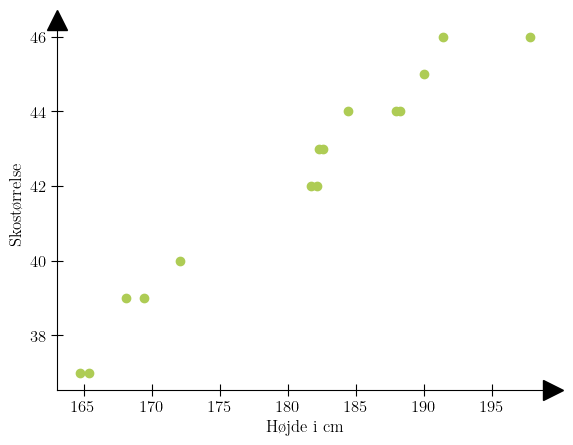

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from myst_nb import glue

animat_green = "#aecc55"
animat_red = "#cc5241"
animat_yellow = "#d9c750"
animat_blue = "#6a90cc"

# Data
df = pd.DataFrame({
    'Højde i cm': [182.3,184.4,168.1,165.4,164.7,172.1,191.4,197.8,187.9,182.1,182.6,188.2,190.0,181.7,169.4],
    'Skostørrelse': [43,44,39,37,37,40,46,46,44,42,43,44,45,42,39]
})

# Initialize plot mimicing manim/TikZ
# Enable LaTeX for all text
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Scatter plot
fig, ax = plt.subplots()
ax.scatter(x=df['Højde i cm'],y=df['Skostørrelse'], color=animat_green)

# Remove top and right spines
ax.spines[['top', 'right']].set_visible(False)

# Draw axis arrow tips
ax.plot(1, 0, ">k", transform=ax.transAxes, clip_on=False, markersize=15)  
ax.plot(0, 1, "^k", transform=ax.transAxes, clip_on=False, markersize=15) 

# Draw ticks
ax.tick_params(direction='inout', length=8, labelsize=12)

# Write x and y labels
ax.set_xlabel('Højde i cm', fontsize=12)
ax.set_ylabel('Skostørrelse', fontsize=12)
# plt.xlabel(r'\textit{x}', fontsize=14)
# plt.ylabel(r'\textit{y}', fontsize=14, rotation=0)
# ax.xaxis.set_label_coords(1.025, 0.075)
# ax.yaxis.set_label_coords(0.035, 1.025)

glue('scatter', fig, display=False)

{prf:ref}`hoejde-og-skostoerrelse-scatter` er et eksempel på, hvor vi har et datasæt på formen $(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n)$, hvor $n$ angiver antallet af observationer. Hver række i tabellen angiver et datapar $(x,y)$. For et sådan datasæt giver scatterplottet en let og intuitiv måde at se, om der er sammenhæng mellem vores to variabler.

(ch-korrelationskoefficienten_i)=
## Korrelationskoefficienten I

Sammenhæng i vores data kan også {term}`kvantificere`s gennem korrelation. Korrelationskoefficienten er et tal, der siger noget om, hvordan den ene variabel opfører sig i forhold til den anden variabel. Tallet benævnes ofte med det græske bogstav $\rho$ (udtales "rho").

I vores eksempel fra før havde vi, at når den ene variabel var større, så var den anden variabel også større. Vi siger, at de to variabler er *positivt korrelerede*. Det modsatte tilfælde kan du også støde på. Når en variabel bliver mindre, mens den anden variabel bliver større, så er de to variabler *negativt korrelerede*. Hvis to variabler udvikler uden en tendens med hinanden, så vil de to variabler være *ukorrelerede*.

Korrelationskoefficienten $\rho$ forsøger at kvantificere dette. Koefficienten kan være et tal mellem -1 og 1, altså $\rho\in[-1,1]$. Det er en størrelse, som dit CAS-værktøj kan regne for dig.

```{prf:eksempel}
:label: positiv-korrelation

Lad os også prøve at regne korrelationskoefficienten for vores indsamlet data fra {prf:ref}`hoejde-og-skostoerrelse-scatter`.

Med hjælp fra et CAS-værktøj fås en korrelationskoefficient på

$$

    \rho = 0{,}982,

$$

hvilket fortæller, at Højder i cm og Skostørrelse er positivt korrelerede variabler. Det var også det, som vi kunne konkludere på baggrund af scatterplottet.

```

In [2]:
import numpy as np

# Correlation coefficient
np.corrcoef(df['Højde i cm'],df['Skostørrelse'])

array([[1.        , 0.98231368],
       [0.98231368, 1.        ]])

```

Lad os formalisere det, som vi har lært om korrelationskoefficienten. Lad $X$ og $Y$ være to variabler, der repræsenterer noget data, som vi har indsamlet. Da er 

$$

    \rho = \text{Corr}(X,Y),

$$

hvor $\text{Corr}$ står for "correlation", det engelske for korrelation. For denne størrelse har vi følgende tommelfingerregler: Opfylder korrelationskoefficienten at...

| Korrelationskoefficient      | Grad af korrelation mellem $X$ og $Y$       | 
| ---------------------------- | ------------------------------------------- |
| $\rho = 1$                   | $X$ og $Y$ er perfekt korrelerede.          |
| $0{,}8 \leq \rho < 1$        | $X$ og $Y$ er meget positivt korrelerede.   |
| $0{,}5 \leq \rho < 0{,}8$    | $X$ og $Y$ er moderat positivt korrelerede. |
| $0{,}2 \leq \rho < 0{,}5$    | $X$ og $Y$ er svagt positivt korrelerede.   |
| $-0{,}2 < \rho < 0{,}2$      | $X$ og $Y$ er ukorrelerede.                 |
| $-0{,}5 < \rho \leq 0{,}2$   | $X$ og $Y$ er svagt negativt korrelerede.   | 
| $-0{,}8 < \rho \leq 0{,}5$   | $X$ og $Y$ er moderat negativt korrelerede. |
| $-1 < \rho \leq 0{,}8$       | $X$ og $Y$ er meget negativt korrelerede.   |
| $\rho = -1$                  | $X$ og $Y$ er perfekt negativt korrelerede. |

For at få en forståelse for de tilfælde, hvor vi har med negativ korrelation at gøre, gennemgår vi følgende eksempel:

````{prf:eksempel}
:label: negativ-korrelation

Vi ønsker at undersøge sammenhængen mellem *daglig gennemsnitstemperatur* (i °C) og *dagligt fjernvarmeforbrug* (i kWh). Vi indsamler data for 10 dage i vinterhalvåret, som er gemt i filen {download}`eks_temperatur-og-fjernvarme.xlsx <./eks_temperatur-og-fjernvarme.xlsx>`:

| Gennemsnitstemperatur (°C) | Fjernvarmeforbrug (kWh) |
| -------------------------- | ----------------------- |
|  2                         | 100                     |
|  4                         | 90                      |
|  5                         | 80                      |
|  $\vdots$                  | $\vdots$                |

Her er $x$-variablen "Gennemsnitstemperatur i °C" og $y$-variablen "Fjernvarmeforbrug i kWh".

Hvis vi plottede disse datapunkter i et scatterplot, ville vi visuelt se en tydelig tendens til, at når temperaturen stiger, så falder fjernvarmeforbruget. 

```{glue:figure} scatter_neg
```

Vi beregner korrelationskoefficienten vha. et CAS-værktøj:

$$
    \rho = -0{,}994.
$$

Korrelationskoefficienten ligger tæt på -1, hvilket bekræfter, at vi har en negativ korrelation mellem de to variabler. Når den ene variabel (temperaturen) øges, falder den anden (fjernvarmeforbrug).

````

-0.9944488552584198

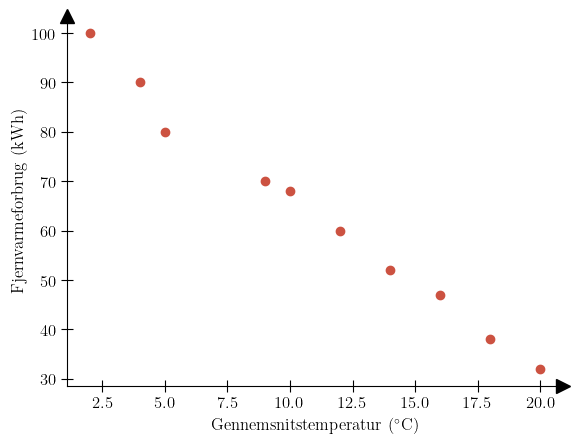

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

animat_green = "#aecc55"
animat_red = "#cc5241"
animat_yellow = "#d9c750"
animat_blue = "#6a90cc"

# Data
df_neg = pd.DataFrame({
    'Temp': [2, 4, 5, 9, 10, 12, 14, 16, 18, 20],
    'Forbrug': [100, 90, 80, 70, 68, 60, 52, 47, 38, 32]
})

rho_neg = np.corrcoef(df_neg['Temp'], df_neg['Forbrug'])[0,1]

# Initialize plot mimicing manim/TikZ
# Enable LaTeX for all text
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig_neg, ax_neg = plt.subplots()
ax_neg.scatter(x=df_neg['Temp'], y=df_neg['Forbrug'], color=animat_red)

# Fjern top- og højre-akse
ax_neg.spines[['top', 'right']].set_visible(False)

# Pil-effekt på akserne
ax_neg.plot(1, 0, ">k", transform=ax_neg.transAxes, clip_on=False, markersize=10)  
ax_neg.plot(0, 1, "^k", transform=ax_neg.transAxes, clip_on=False, markersize=10)

ax_neg.tick_params(direction='inout', length=8, labelsize=12)

ax_neg.set_xlabel(r'Gennemsnitstemperatur ($^\circ\mathrm{C}$)', fontsize=12)
ax_neg.set_ylabel('Fjernvarmeforbrug (kWh)', fontsize=12)

glue('scatter_neg', fig_neg, display=False)
rho_neg

Oftest har vi en idé om opførselen af det data, som vi ønsker at undersøge, inden vi har lavet undersøgelsen. For eksempel, så giver det god mening, at der ikke er sammenhæng mellem hvor, du bor, og hvor store sko, du bruger. Du kan dog godt komme ud for, at du indsamler noget data, der ikke udviser den tendens, som du forventede. Det kan skyldes støj i din indsamling eller at du bare har en uheldig stikprøve. Lad os kigge på et eksempel, hvor vi ikke med data kan konkludere, at der er en sammenhæng mellem de to variabler.

````{prf:eksempel}
:label: ingen-korrelation

Vi ønsker at undersøge sammenhængen mellem *skærmtid per dag* (målt i timer) og *karaktergennemsnit* hos en gruppe gymnasieelever. Vi indsamler data for 12 elever, gemt i filen {download}`eks_skaermtid-og-karakterer.xlsx <./eks_skaermtid-og-karakterer.xlsx>`:

| Skærmtid pr. dag (timer) | Karaktergennemsnit |
| ------------------------ | ------------------ |
| 2                        | 7,1                |
| 3                        | 10,5               |
| 6                        | 4,2                |
| $\vdots$                 | $\vdots$           |

Her lader vi *Skærmtid pr. dag* være $x$-aksen og *Karaktergennemsnit* være $y$-aksen. Vores hypotese kunne have været, at mere skærmtid ville give lavere karakterer (negativ korrelation), men lad os se, hvad data viser.

```{glue:figure} scatter_skaerm
```

CAS-beregningen viser, at korrelationskoefficienten

$$
    \rho = 0{,}031,
$$

som er meget tæt på nul. Det betyder, at der ikke er nogen entydig lineær sammenhæng mellem skærmtid og karaktergennemsnit i dette datasæt. Det er et eksempel på, at man godt kan forvente en effekt, men at ens reelle data kan være for støjfyldte eller baseret på en for lille (eller uheldig) stikprøve til at bekræfte hypotesen.

````

0.030881041181537294

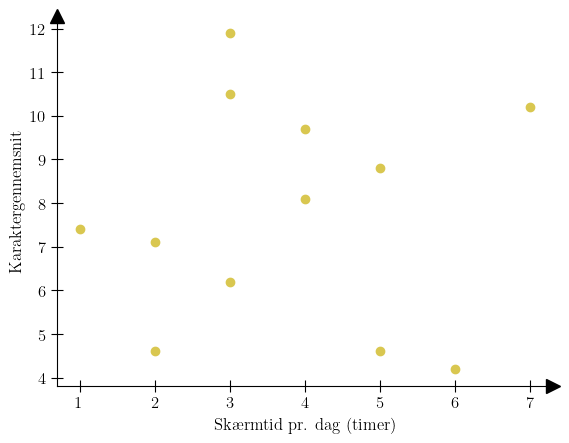

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from myst_nb import glue

animat_green = "#aecc55"
animat_red = "#cc5241"
animat_yellow = "#d9c750"
animat_blue = "#6a90cc"

df_skaerm = pd.DataFrame({
    'Skaermtid': [2, 3, 6, 4, 1, 5, 3, 7, 2, 5, 3, 4],
    'Karakter':  [7.1, 10.5, 4.2, 9.7, 7.4, 8.8, 11.9, 10.2, 4.6, 4.6, 6.2, 8.1]
})

# Beregn korrelationskoefficient
rho_skaerm = np.corrcoef(df_skaerm['Skaermtid'], df_skaerm['Karakter'])[0,1]

# Initialize plot mimicing manim/TikZ
# Enable LaTeX for all text
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig_skaerm, ax_skaerm = plt.subplots()
ax_skaerm.scatter(df_skaerm['Skaermtid'], df_skaerm['Karakter'], color=animat_yellow)

# Fjern top- og højre akse
ax_skaerm.spines[['top', 'right']].set_visible(False)

# Pil-effekt på akserne
ax_skaerm.plot(1, 0, ">k", transform=ax_skaerm.transAxes, clip_on=False, markersize=10)
ax_skaerm.plot(0, 1, "^k", transform=ax_skaerm.transAxes, clip_on=False, markersize=10)

ax_skaerm.tick_params(direction='inout', length=8, labelsize=12)

ax_skaerm.set_xlabel('Skærmtid pr. dag (timer)', fontsize=12)
ax_skaerm.set_ylabel('Karaktergennemsnit', fontsize=12)

glue('scatter_skaerm', fig_skaerm, display=False)
rho_skaerm

Som det fremgår, kan selv en umiddelbart *logisk* forventning om en korrelation ende med en resultatværdi af $\rho$ nær 0, hvis data er for spredte eller ikke indsamlet på en måde, der afspejler den forventede effekt.

```